<a href="https://colab.research.google.com/github/fbrii12/datasheet-EDA/blob/main/2318068_Febri_Maulana_Rokhman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
1. Upload file datasheet

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving game_info.csv to game_info.csv
Saving vgsales.csv to vgsales.csv


2. Import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

3. Membaca Dataset

In [ ]:
# Membaca dua dataset
game_info = pd.read_csv("game_info.csv")
vgsales = pd.read_csv("vgsales.csv")

# Menampilkan 5 data pertama dari masing-masing
print("=== Dataset 1: game_info ===")
display(game_info.head())

print("\n=== Dataset 2: vgsales ===")
display(vgsales.head())

=== Dataset 1: game_info ===


,id,slug,name,metacritic,released,tba,updated,website,rating,rating_top,...,developers,genres,publishers,esrb_rating,added_status_yet,added_status_owned,added_status_beaten,added_status_toplay,added_status_dropped,added_status_playing
0,1,dgeneration-hd,D/Generation HD,NaN,2015-10-23,False,2019-09-17T11:58:57,http://dgeneration.net,0.0,0,...,West Coast Software,Adventure||Puzzle,West Coast Software,Everyone 10+,4,88,2,2,0,0
1,10,g-prime,G Prime Into The Rain,NaN,2016-01-06,False,2019-11-06T23:04:19,NaN,0.0,0,...,Soma Games,Simulation||Indie,Immanitas Entertainment||Code-Monkeys,Everyone,2,42,2,0,0,0
2,100,land-sliders,Land Sliders,NaN,2015-09-24,False,2019-10-22T13:56:16,http://prettygreat.com,0.0,0,...,Prettygreat Pty,Adventure||Arcade,Prettygreat Pty,Everyone 10+,0,2,2,0,1,0
3,1000,pixel-gear,Pixel Gear,NaN,2016-10-20,False,2019-08-28T22:16:02,https://www.facebook.com/Geronimo-Interactive-...,0.0,0,...,Oasis Games||Geronimo Interactive,Action||Indie,Geronimo Interactive,Teen,0,1,0,0,0,0
4,10000,gods-and-idols,Gods and Idols,NaN,2016-12-12,False,2019-09-17T13:37:13,http://www.godsandidols.com/,0.0,1,...,Viking Tao,RPG||Strategy||Massively Multiplayer,Viking Tao,NaN,2,79,0,0,0,0



=== Dataset 2: vgsales ===


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


4. Cleansing Dataset

In [ ]:
import re

game_info.drop_duplicates(inplace=True)
vgsales.drop_duplicates(inplace=True)
game_info.dropna(subset=['name'], inplace=True)
vgsales.dropna(subset=['Name'], inplace=True)

def clean_name(text):
    return re.sub(r'[^a-z0-9\s]', '', str(text).lower()).strip()

game_info['name_clean'] = game_info['name'].apply(clean_name)
vgsales['Name_clean'] = vgsales['Name'].apply(clean_name)

game_info = game_info.loc[:, game_info.isnull().mean() < 0.8]

print("=== Info Dataset Game Info ===")
print(game_info.info())
print(game_info.describe(include='all'))

print("\n=== Info Dataset VG Sales ===")
print(vgsales.info())
print(vgsales.describe(include='all'))

print("\n=== Missing Values ===")
print("Game Info:\n", game_info.isnull().sum())
print("\nVG Sales:\n", vgsales.isnull().sum())

=== Info Dataset Game Info ===
<class 'pandas.core.frame.DataFrame'>
Index: 474414 entries, 0 to 474416
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    474414 non-null  int64  
 1   slug                  474414 non-null  object 
 2   name                  474414 non-null  object 
 3   released              450215 non-null  object 
 4   tba                   474414 non-null  bool   
 5   updated               474414 non-null  object 
 6   rating                474414 non-null  float64
 7   rating_top            474414 non-null  int64  
 8   playtime              474414 non-null  int64  
 9   achievements_count    474414 non-null  int64  
 10  ratings_count         474414 non-null  int64  
 11  suggestions_count     474414 non-null  int64  
 12  game_series_count     474414 non-null  int64  
 13  reviews_count         474414 non-null  int64  
 14  platforms             4704

5. Heatmap korelasi datasheet

=== Heatmap Korelasi: Game Info ===


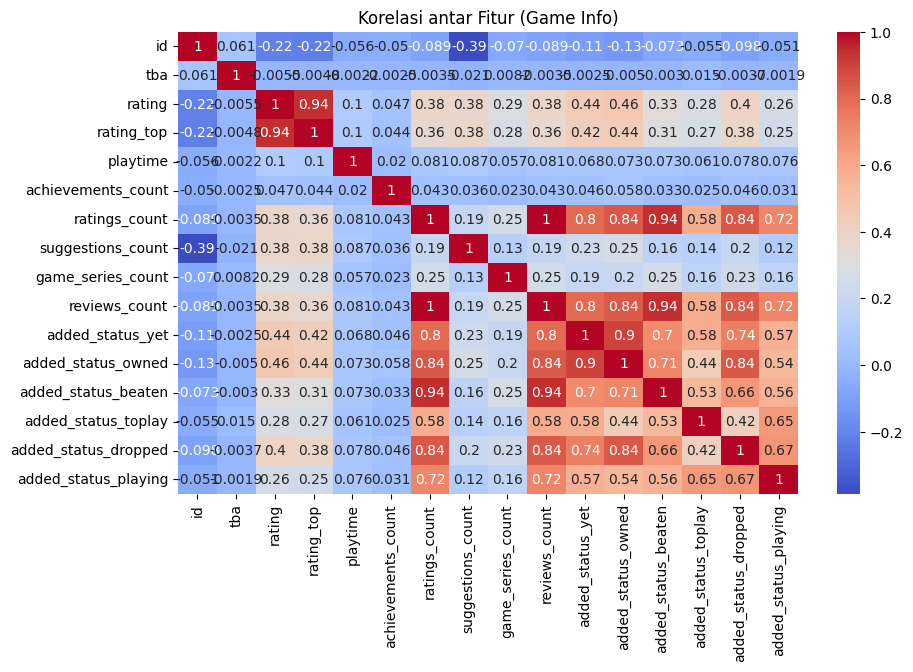


=== Heatmap Korelasi: VG Sales ===


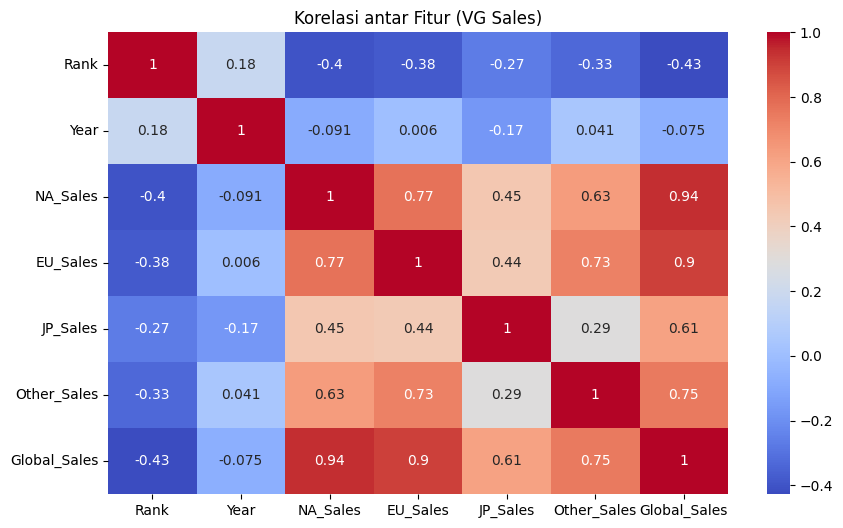

In [ ]:
print("=== Heatmap Korelasi: Game Info ===")
plt.figure(figsize=(10,6))
sns.heatmap(game_info.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Korelasi antar Fitur (Game Info)")
plt.show()

print("\n=== Heatmap Korelasi: VG Sales ===")
plt.figure(figsize=(10,6))
sns.heatmap(vgsales.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Korelasi antar Fitur (VG Sales)")
plt.show()

6. Memvisualisasikan Datasheet

=== Visualisasi Dataset Game Info ===


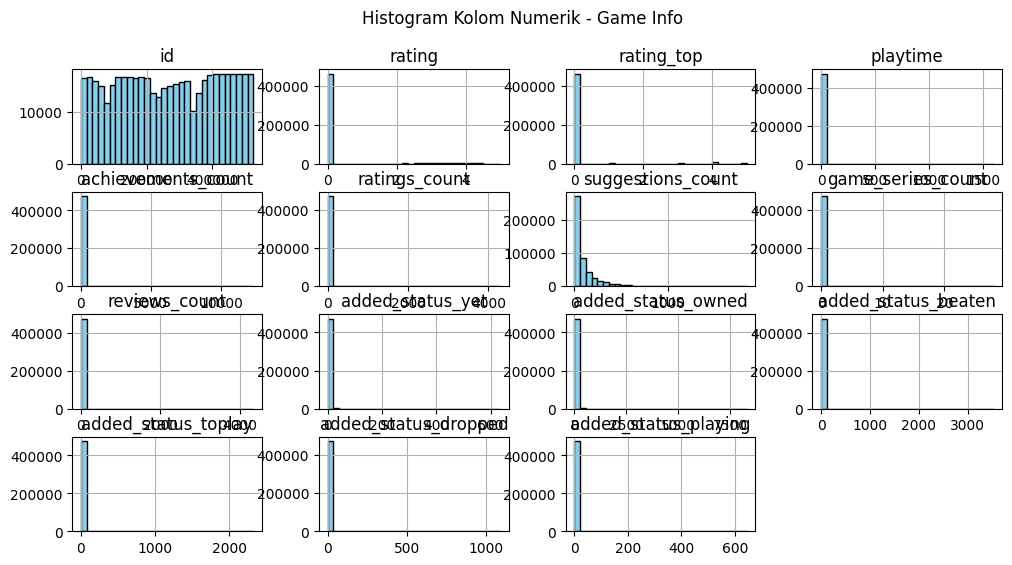

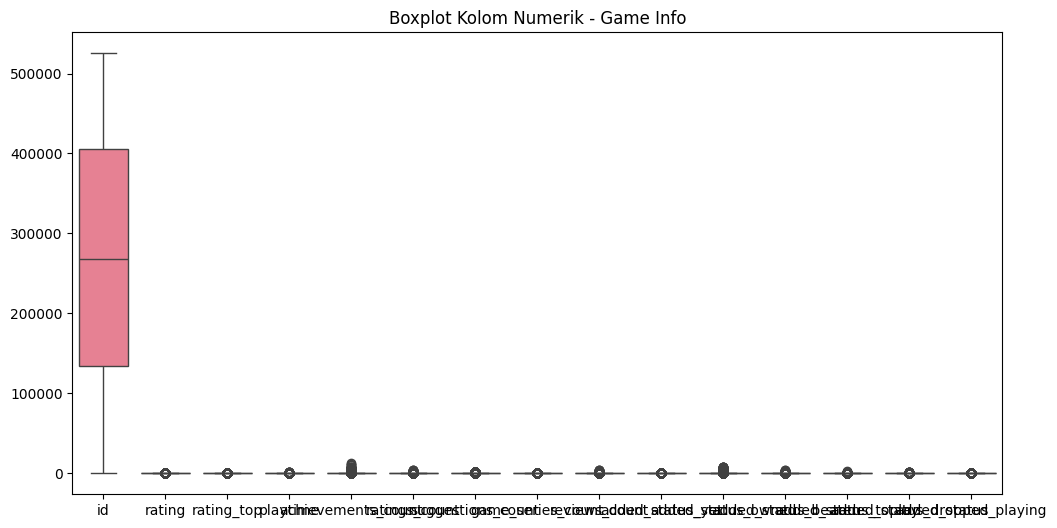


=== Visualisasi Dataset VG Sales ===


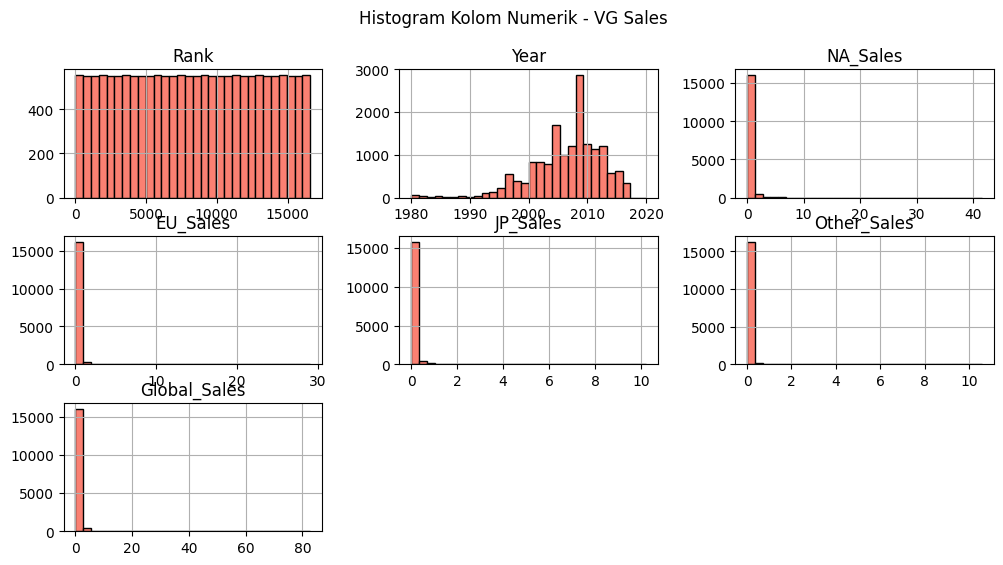

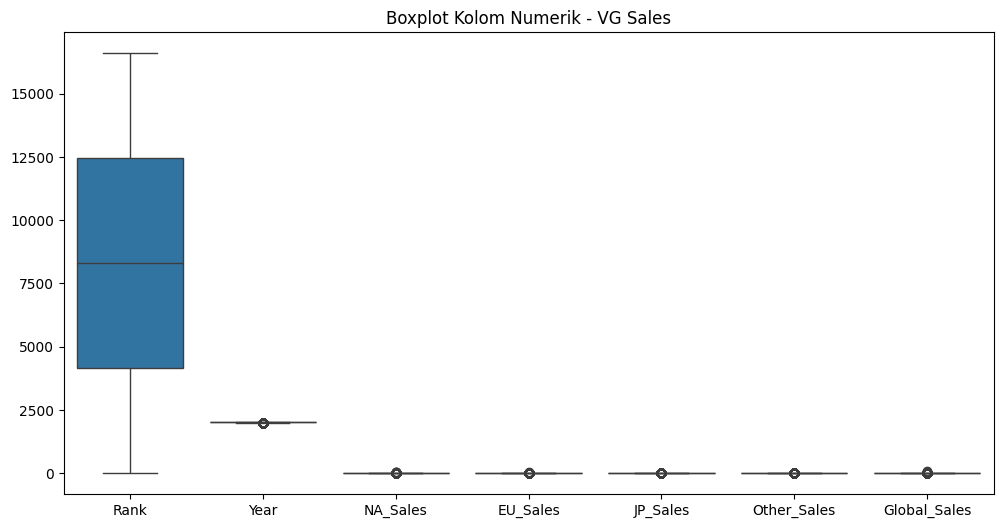

In [ ]:
print("=== Visualisasi Dataset Game Info ===")

game_info.select_dtypes(include='number').hist(figsize=(12,6), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Histogram Kolom Numerik - Game Info")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=game_info.select_dtypes(include='number'))
plt.title("Boxplot Kolom Numerik - Game Info")
plt.show()

print("\n=== Visualisasi Dataset VG Sales ===")

vgsales.select_dtypes(include='number').hist(figsize=(12,6), bins=30, color='salmon', edgecolor='black')
plt.suptitle("Histogram Kolom Numerik - VG Sales")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=vgsales.select_dtypes(include='number'))
plt.title("Boxplot Kolom Numerik - VG Sales")
plt.show()

7. Perbandingan Distribusi Penjualan Game

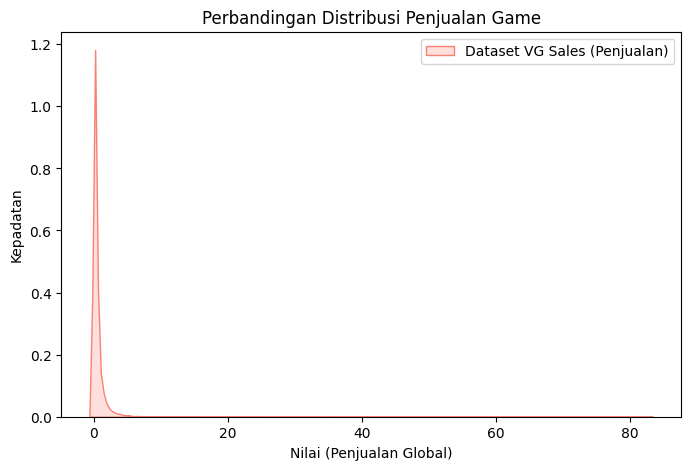

In [ ]:
vgsales['Global_Sales'] = pd.to_numeric(vgsales['Global_Sales'], errors='coerce')

vgsales = vgsales.dropna(subset=['Global_Sales'])

plt.figure(figsize=(8,5))
sns.kdeplot(vgsales['Global_Sales'], label='Dataset VG Sales (Penjualan)', fill=True, color='salmon')

plt.title('Perbandingan Distribusi Penjualan Game')
plt.xlabel('Nilai (Penjualan Global)')
plt.ylabel('Kepadatan')
plt.legend()
plt.show()